In [15]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

!pip install tensorflow
!pip install keras
!pip install keras.utils
import tensorflow as tf
!pip install pydot
!pip install -U scikit-learn

np.random.seed(1234)

# Loading libraries

In [17]:
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from keras.constraints import maxnorm
from IPython.display import SVG
from keras.regularizers import l2, l1, l1_l2


from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import string
import plotly.graph_objs as go
#import plotly.figure_factory as ff
#from plotly import tools
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)

# Load dataset with tensor

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)

x_train

(60000, 28, 28)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# reshaping X_train and X_test
X_train = x_train.reshape(x_train.shape[0], 28, 28,1).astype(np.uint8)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1 ).astype(np.uint8)

In [ ]:
print(X_train.shape)
print(X_test.shape)
#plt.imshow(X_train[100])

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

In [ ]:
y_train_cnn.shape
#y_test_cnn.shape


(60000, 10)

#Fashion MNIST

# Dataset Plot

In [192]:
label = {0:"T-shirt/top",
1 :"Trouser",
2 :"Pullover",
3 :"Dress",
4 :"Coat",
5 :"Sandal",
6 :"Shirt",
7 :"Sneaker",
8 :"Bag",
9 :"Ankle boot"}
colms =  ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [193]:
df_train = pd.read_csv("https://www.cs.mcgill.ca/~aislam18/backup/fashion-mnist_train.csv")

In [194]:
df_test = pd.read_csv("https://www.cs.mcgill.ca/~aislam18/backup/fashion-mnist_test.csv")

In [195]:
l1 =[j for i,j in label.items()]
l1


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [196]:
l2 = df_train.label.value_counts()
fig = go.Figure(data=[go.Pie(labels=l1, values=l2.values)])
fig.update_traces(title = "Distribution of Classes in Train_set")
fig.update_traces(hoverinfo ='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [197]:
l2 = df_test.label.value_counts()
fig = go.Figure(data=[go.Pie(labels=l1, values=l2.values)])
fig.update_traces(title = "Distribution of Classes in test_set")
fig.update_traces(hoverinfo ='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [198]:
X_train = df_train.drop("label",axis=1)
Y_train = df_train["label"]

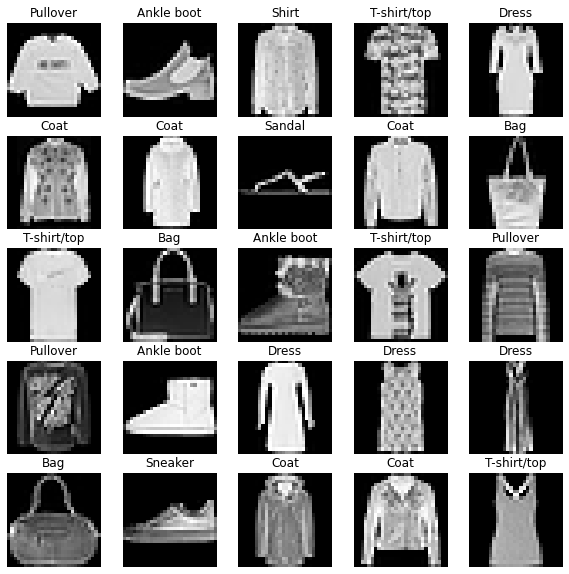

In [199]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train.iloc[i].values.reshape((28,28)),cmap="gray")
    index = int(Y_train[i])
    plt.axis("off")
    plt.title(colms[index])
plt.show()    

# Data Normalization

In [ ]:
# normalize train and test from 0-1 scale
x_train_norm, x_test_norm = X_train/255.0, X_test/255.0;
#x_train_norm

# Baseline CNN model

In [ ]:
# Model
def create_model(learn_rate=0.01,dropout_rate=5e-1):
  cnn = Sequential()
  cnn.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

  cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

  cnn.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

  cnn.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

  cnn.add(Flatten())
  cnn.add(Dense(1024, activation='relu'))

  cnn.add(Dropout(dropout_rate))


  cnn.add(Dense(10, activation='softmax'))

  opt = Adam(lr= learn_rate, beta_1=0.9, beta_2=0.999)#SGD(lr=1e-3, momentum=0.95, name='adam')
  
  cnn.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  #model.summary()
  cnn.summary()

  tf.keras.utils.plot_model(cnn, show_shapes=True)

  return cnn

## Training Model

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 20736)             0         
                                                                 
 dense_26 (Dense)            (None, 1024)            

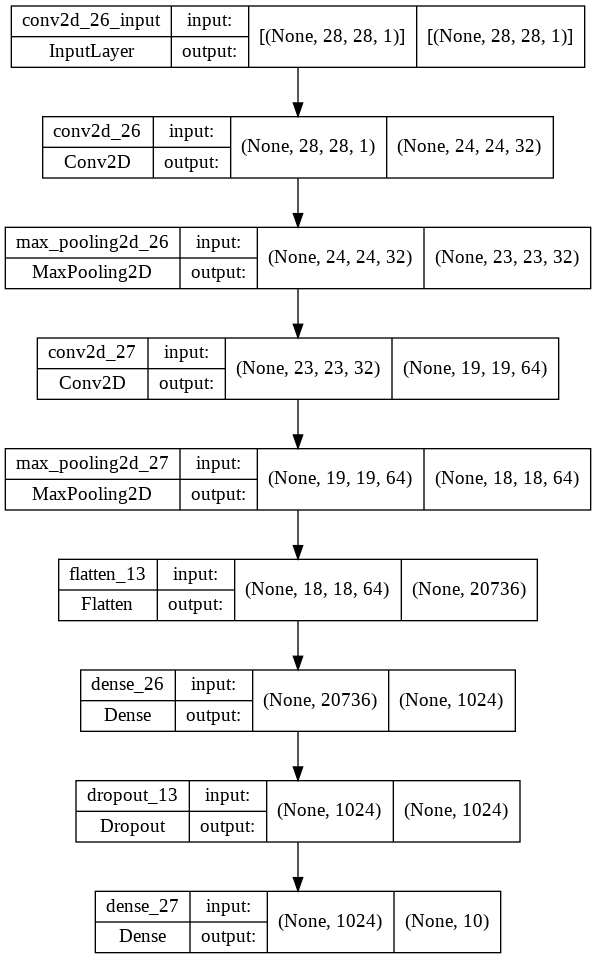

In [102]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))

cnn.add(Dropout(0.5))


cnn.add(Dense(10, activation='softmax'))

opt = Adam(lr= 1e-3, beta_1=0.9, beta_2=0.999)#SGD(lr=1e-3, momentum=0.95, name='adam')
  
cnn.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  #model.summary()
cnn.summary()

tf.keras.utils.plot_model(cnn, show_shapes=True)


In [103]:
history = cnn.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 8s 16ms/step - loss: 0.5831 - accuracy: 0.8264 - val_loss: 0.3659 - val_accuracy: 0.8670
Epoch 2/25
469/469 [==============================] - 7s 16ms/step - loss: 0.3209 - accuracy: 0.8806 - val_loss: 0.3151 - val_accuracy: 0.8879
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.2691 - accuracy: 0.8988 - val_loss: 0.2822 - val_accuracy: 0.8969
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.2340 - accuracy: 0.9131 - val_loss: 0.2639 - val_accuracy: 0.9061
Epoch 5/25
469/469 [==============================] - 8s 17ms/step - loss: 0.2062 - accuracy: 0.9231 - val_loss: 0.2623 - val_accuracy: 0.9055
Epoch 6/25
469/469 [==============================] - 9s 19ms/step - loss: 0.1850 - accuracy: 0.9311 - val_loss: 0.2699 - val_accuracy: 0.9069
Epoch 7/25
469/469 [==============================] - 10s 21ms/step - loss: 0.1639 - accuracy: 0.9396 - val_loss: 0.2793 - val_accuracy: 0.903

In [104]:
score = cnn.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5005035400390625
Test accuracy: 0.9174000024795532


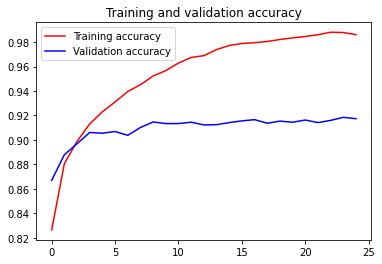

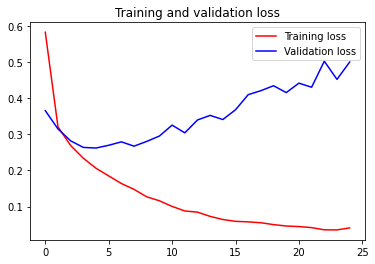

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy1 = history.history['accuracy']
val_accuracy1 = history.history['val_accuracy']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']
epochs = range(len(accuracy1))

plt.plot(epochs, accuracy1, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss1, 'r', label='Training loss')
plt.plot(epochs, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()




# Experiments

# Dropout rate

Dropout rate: 0.4

In [106]:
cnn1_d1 = Sequential()
cnn1_d1.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn1_d1.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn1_d1.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn1_d1.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn1_d1.add(Flatten())
cnn1_d1.add(Dense(1024, activation='relu'))

cnn1_d1.add(Dropout(rate=4e-1))


cnn1_d1.add(Dense(10, activation='softmax'))

In [112]:
opt= Adam(lr=1e-3, beta_1=0.9,beta_2=0.999)
cnn1_d1.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [129]:
history1_d1 = cnn1_d1.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.5099 - val_accuracy: 0.9207
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0294 - accuracy: 0.9906 - val_loss: 0.5255 - val_accuracy: 0.9207
Epoch 3/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.5502 - val_accuracy: 0.9189
Epoch 4/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.5500 - val_accuracy: 0.9197
Epoch 5/25
469/469 [==============================] - 8s 16ms/step - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.5909 - val_accuracy: 0.9205
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.5858 - val_accuracy: 0.9186
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.5495 - val_accuracy: 0.9208

In [128]:
score1_d1 = cnn1_d1.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score1_d1[0])
print('Test accuracy:', score1_d1[1])

Test loss: 0.47345566749572754
Test accuracy: 0.9218000173568726


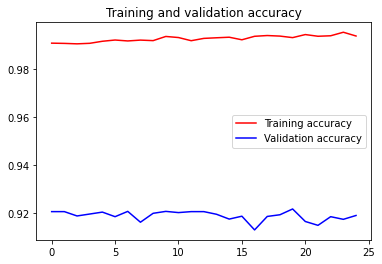

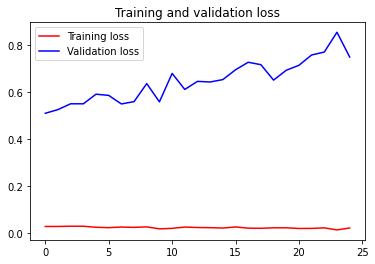

In [131]:
accuracy1_d1 = history1_d1.history['accuracy']
val_accuracy1_d1 = history1_d1.history['val_accuracy']
loss1_d1 = history1_d1.history['loss']
val_loss1_d1 = history1_d1.history['val_loss']
epochs = range(len(accuracy1_d1))

plt.plot(epochs, accuracy1_d1, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy1_d1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss1_d1, 'r', label='Training loss')
plt.plot(epochs, val_loss1_d1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Drop rate: 0.6

In [116]:
cnn1_d2 = Sequential()
cnn1_d2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn1_d2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn1_d2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn1_d2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn1_d2.add(Flatten())
cnn1_d2.add(Dense(1024, activation='relu'))

cnn1_d2.add(Dropout(rate=6e-1))


cnn1_d2.add(Dense(10, activation='softmax'))

In [117]:
opt= Adam(lr=1e-3, beta_1=0.9,beta_2=0.999)
cnn1_d2.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [126]:
history1_d2 = cnn1_d2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 7s 16ms/step - loss: 0.3491 - accuracy: 0.8777 - val_loss: 0.1682 - val_accuracy: 0.9406
Epoch 2/25
469/469 [==============================] - 9s 18ms/step - loss: 0.2580 - accuracy: 0.9053 - val_loss: 0.1520 - val_accuracy: 0.9487
Epoch 3/25
469/469 [==============================] - 7s 16ms/step - loss: 0.2225 - accuracy: 0.9166 - val_loss: 0.1492 - val_accuracy: 0.9457
Epoch 4/25
469/469 [==============================] - 8s 17ms/step - loss: 0.1931 - accuracy: 0.9283 - val_loss: 0.1495 - val_accuracy: 0.9443
Epoch 5/25
469/469 [==============================] - 7s 16ms/step - loss: 0.1745 - accuracy: 0.9358 - val_loss: 0.1554 - val_accuracy: 0.9417
Epoch 6/25
469/469 [==============================] - 8s 17ms/step - loss: 0.1532 - accuracy: 0.9438 - val_loss: 0.1589 - val_accuracy: 0.9426
Epoch 7/25
469/469 [==============================] - 7s 16ms/step - loss: 0.1357 - accuracy: 0.9490 - val_loss: 0.1691 - val_accuracy: 0.9392

In [127]:
score1_d2 = cnn1_d2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score1_d2[0])
print('Test accuracy:', score1_d2[1])

Test loss: 0.33097952604293823
Test accuracy: 0.930899977684021


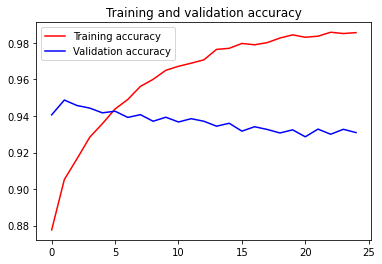

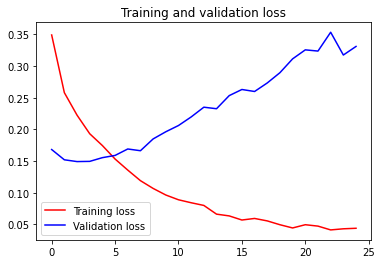

In [132]:
accuracy1_d2 = history1_d2.history['accuracy']
val_accuracy1_d2 = history1_d2.history['val_accuracy']
loss1_d2 = history1_d2.history['loss']
val_loss1_d2 = history1_d2.history['val_loss']
epochs = range(len(accuracy1_d2))

plt.plot(epochs, accuracy1_d2, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy1_d2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss1_d2, 'r', label='Training loss')
plt.plot(epochs, val_loss1_d2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Dropout rate: 0.7

In [171]:
cnn1_d3 = Sequential()
cnn1_d3.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn1_d3.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn1_d3.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn1_d3.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn1_d3.add(Flatten())
cnn1_d3.add(Dense(1024, activation='relu'))

cnn1_d3.add(Dropout(rate=7e-1))


cnn1_d3.add(Dense(10, activation='softmax'))

In [172]:
opt= Adam(lr=1e-3, beta_1=0.9,beta_2=0.999)
cnn1_d3.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [168]:
history1_d3 = cnn1_d3.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 7s 15ms/step - loss: 0.3690 - accuracy: 0.8736 - val_loss: 0.1885 - val_accuracy: 0.9339
Epoch 2/25
469/469 [==============================] - 7s 16ms/step - loss: 0.2882 - accuracy: 0.8963 - val_loss: 0.1771 - val_accuracy: 0.9408
Epoch 3/25
469/469 [==============================] - 8s 16ms/step - loss: 0.2501 - accuracy: 0.9077 - val_loss: 0.1614 - val_accuracy: 0.9436
Epoch 4/25
469/469 [==============================] - 8s 16ms/step - loss: 0.2292 - accuracy: 0.9146 - val_loss: 0.1647 - val_accuracy: 0.9414
Epoch 5/25
469/469 [==============================] - 8s 16ms/step - loss: 0.2064 - accuracy: 0.9227 - val_loss: 0.1673 - val_accuracy: 0.9395
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1883 - accuracy: 0.9307 - val_loss: 0.1776 - val_accuracy: 0.9350
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1730 - accuracy: 0.9362 - val_loss: 0.1809 - val_accuracy: 0.9349

In [169]:
score1_d3 = cnn1_d3.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score1_d3[0])
print('Test accuracy:', score1_d3[1])

Test loss: 0.3521326780319214
Test accuracy: 0.927299976348877


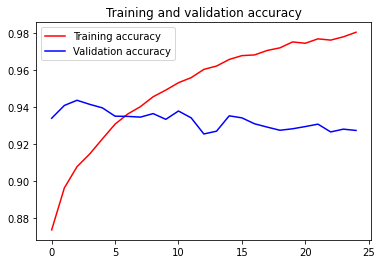

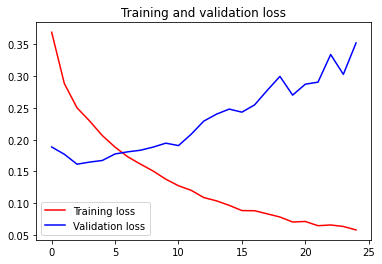

In [170]:
accuracy1_d3 = history1_d3.history['accuracy']
val_accuracy1_d3 = history1_d3.history['val_accuracy']
loss1_d3 = history1_d3.history['loss']
val_loss1_d3 = history1_d3.history['val_loss']
epochs = range(len(accuracy1_d3))

plt.plot(epochs, accuracy1_d3, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy1_d3, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss1_d3, 'r', label='Training loss')
plt.plot(epochs, val_loss1_d3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# Batch size experiments

Batch size: 64

In [142]:
cnn1_b1 = Sequential()
cnn1_b1.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn1_b1.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn1_b1.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn1_b1.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn1_b1.add(Flatten())
cnn1_b1.add(Dense(1024, activation='relu'))

cnn1_b1.add(Dropout(rate=5e-1))


cnn1_b1.add(Dense(10, activation='softmax'))

In [143]:
opt= Adam(lr=1e-3, beta_1=0.9,beta_2=0.999)
cnn1_b1.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [144]:
history1_b1 = cnn1_b1.fit(x_train_norm, y_train_cnn,
                  batch_size=64,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
938/938 [==============================] - 12s 12ms/step - loss: 0.5382 - accuracy: 0.8250 - val_loss: 0.3743 - val_accuracy: 0.8634
Epoch 2/25
938/938 [==============================] - 10s 11ms/step - loss: 0.3276 - accuracy: 0.8810 - val_loss: 0.3033 - val_accuracy: 0.8887
Epoch 3/25
938/938 [==============================] - 11s 11ms/step - loss: 0.2777 - accuracy: 0.8978 - val_loss: 0.2991 - val_accuracy: 0.8946
Epoch 4/25
938/938 [==============================] - 11s 11ms/step - loss: 0.2430 - accuracy: 0.9102 - val_loss: 0.2751 - val_accuracy: 0.8997
Epoch 5/25
938/938 [==============================] - 12s 12ms/step - loss: 0.2160 - accuracy: 0.9204 - val_loss: 0.2788 - val_accuracy: 0.9041
Epoch 6/25
938/938 [==============================] - 10s 11ms/step - loss: 0.1975 - accuracy: 0.9259 - val_loss: 0.2745 - val_accuracy: 0.9104
Epoch 7/25
938/938 [==============================] - 11s 12ms/step - loss: 0.1707 - accuracy: 0.9369 - val_loss: 0.2852 - val_accuracy:

In [145]:
score1_b1 = cnn1_b1.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score1_b1[0])
print('Test accuracy:', score1_b1[1])

Test loss: 0.5715839862823486
Test accuracy: 0.9139999747276306


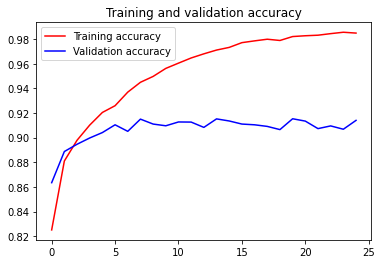

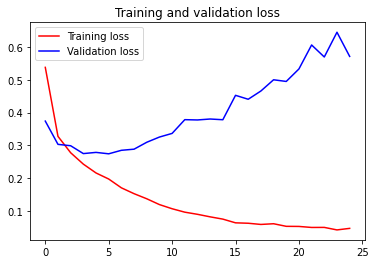

In [146]:
accuracy1_b1 = history1_b1.history['accuracy']
val_accuracy1_b1 = history1_b1.history['val_accuracy']
loss1_b1 = history1_b1.history['loss']
val_loss1_b1 = history1_b1.history['val_loss']
epochs = range(len(accuracy1_b1))

plt.plot(epochs, accuracy1_b1, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy1_b1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss1_b1, 'r', label='Training loss')
plt.plot(epochs, val_loss1_b1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Batch size: 256

In [147]:
cnn1_b2 = Sequential()
cnn1_b2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn1_b2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn1_b2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn1_b2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn1_b2.add(Flatten())
cnn1_b2.add(Dense(1024, activation='relu'))

cnn1_b2.add(Dropout(rate=5e-1))


cnn1_b2.add(Dense(10, activation='softmax'))

In [148]:
opt= Adam(lr=1e-3, beta_1=0.9,beta_2=0.999)
cnn1_b2.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [149]:
history1_b2 = cnn1_b2.fit(x_train_norm, y_train_cnn,
                  batch_size=256,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
235/235 [==============================] - 8s 30ms/step - loss: 0.8144 - accuracy: 0.8018 - val_loss: 0.3761 - val_accuracy: 0.8651
Epoch 2/25
235/235 [==============================] - 6s 24ms/step - loss: 0.3406 - accuracy: 0.8750 - val_loss: 0.3308 - val_accuracy: 0.8747
Epoch 3/25
235/235 [==============================] - 6s 24ms/step - loss: 0.2978 - accuracy: 0.8895 - val_loss: 0.3330 - val_accuracy: 0.8754
Epoch 4/25
235/235 [==============================] - 6s 24ms/step - loss: 0.2674 - accuracy: 0.9003 - val_loss: 0.2959 - val_accuracy: 0.8918
Epoch 5/25
235/235 [==============================] - 6s 24ms/step - loss: 0.2384 - accuracy: 0.9101 - val_loss: 0.2746 - val_accuracy: 0.8997
Epoch 6/25
235/235 [==============================] - 6s 24ms/step - loss: 0.2208 - accuracy: 0.9162 - val_loss: 0.2772 - val_accuracy: 0.8953
Epoch 7/25
235/235 [==============================] - 6s 25ms/step - loss: 0.1984 - accuracy: 0.9242 - val_loss: 0.2776 - val_accuracy: 0.9022

In [150]:
score1_b2 = cnn1_b2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score1_b2[0])
print('Test accuracy:', score1_b2[1])

Test loss: 0.41542747616767883
Test accuracy: 0.9121999740600586


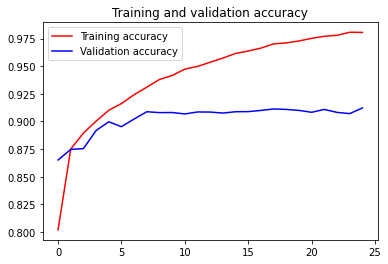

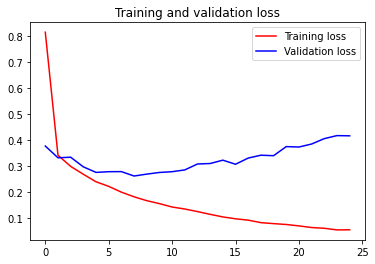

In [151]:
accuracy1_b2 = history1_b2.history['accuracy']
val_accuracy1_b2 = history1_b2.history['val_accuracy']
loss1_b2 = history1_b2.history['loss']
val_loss1_b2 = history1_b2.history['val_loss']
epochs = range(len(accuracy1_b2))

plt.plot(epochs, accuracy1_b2, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy1_b2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss1_b2, 'r', label='Training loss')
plt.plot(epochs, val_loss1_b2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Learning rate Experiments

Learning rate: 0.01

In [152]:
cnn1_l1 = Sequential()
cnn1_l1.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn1_l1.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn1_l1.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn1_l1.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn1_l1.add(Flatten())
cnn1_l1.add(Dense(1024, activation='relu'))

cnn1_l1.add(Dropout(rate=5e-1))


cnn1_l1.add(Dense(10, activation='softmax'))

In [153]:
opt= Adam(lr=1e-2, beta_1=0.9,beta_2=0.999)
cnn1_l1.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [154]:
history1_l1 = cnn1_l1.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 122s 16ms/step - loss: 2.0375 - accuracy: 0.7129 - val_loss: 0.6187 - val_accuracy: 0.7684
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.6206 - accuracy: 0.7744 - val_loss: 0.5805 - val_accuracy: 0.7866
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.5649 - accuracy: 0.7962 - val_loss: 0.5581 - val_accuracy: 0.7905
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.5212 - accuracy: 0.8107 - val_loss: 0.5098 - val_accuracy: 0.8155
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.4902 - accuracy: 0.8208 - val_loss: 0.4809 - val_accuracy: 0.8215
Epoch 6/25
469/469 [==============================] - 8s 17ms/step - loss: 0.4683 - accuracy: 0.8289 - val_loss: 0.4656 - val_accuracy: 0.8254
Epoch 7/25
469/469 [==============================] - 8s 17ms/step - loss: 0.4634 - accuracy: 0.8305 - val_loss: 0.4684 - val_accuracy: 0.83

In [155]:
score1_l1 = cnn1_l1.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score1_l1[0])
print('Test accuracy:', score1_l1[1])

Test loss: 0.5079562067985535
Test accuracy: 0.8382999897003174


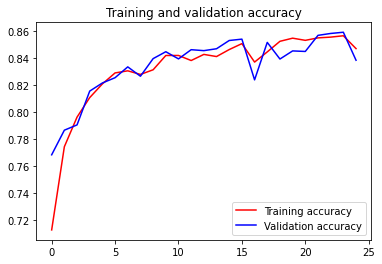

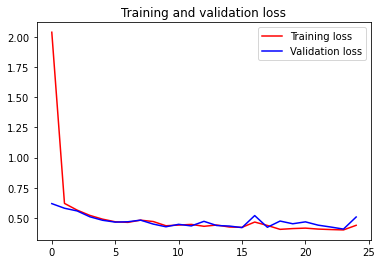

In [157]:
accuracy1_l1 = history1_l1.history['accuracy']
val_accuracy1_l1 = history1_l1.history['val_accuracy']
loss1_l1 = history1_l1.history['loss']
val_loss1_l1 = history1_l1.history['val_loss']
epochs = range(len(accuracy1_l1))

plt.plot(epochs, accuracy1_l1, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy1_l1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss1_l1, 'r', label='Training loss')
plt.plot(epochs, val_loss1_l1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Learning rate: 0.002





In [158]:
cnn1_l2 = Sequential()
cnn1_l2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn1_l2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn1_l2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn1_l2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn1_l2.add(Flatten())
cnn1_l2.add(Dense(1024, activation='relu'))

cnn1_l2.add(Dropout(rate=5e-1))


cnn1_l2.add(Dense(10, activation='softmax'))

In [159]:
opt= Adam(lr=2e-3, beta_1=0.9,beta_2=0.999)
cnn1_l2.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [160]:
history1_l2 = cnn1_l2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 8s 16ms/step - loss: 0.7417 - accuracy: 0.7862 - val_loss: 0.4427 - val_accuracy: 0.8408
Epoch 2/25
469/469 [==============================] - 7s 16ms/step - loss: 0.4133 - accuracy: 0.8471 - val_loss: 0.3867 - val_accuracy: 0.8579
Epoch 3/25
469/469 [==============================] - 7s 16ms/step - loss: 0.3654 - accuracy: 0.8641 - val_loss: 0.3682 - val_accuracy: 0.8647
Epoch 4/25
469/469 [==============================] - 7s 16ms/step - loss: 0.3361 - accuracy: 0.8746 - val_loss: 0.3532 - val_accuracy: 0.8741
Epoch 5/25
469/469 [==============================] - 7s 16ms/step - loss: 0.3129 - accuracy: 0.8827 - val_loss: 0.3510 - val_accuracy: 0.8710
Epoch 6/25
469/469 [==============================] - 7s 16ms/step - loss: 0.2898 - accuracy: 0.8916 - val_loss: 0.3250 - val_accuracy: 0.8833
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.2777 - accuracy: 0.8956 - val_loss: 0.3213 - val_accuracy: 0.8839

In [161]:
score1_l2 = cnn1_l2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score1_l2[0])
print('Test accuracy:', score1_l2[1])

Test loss: 0.4449390172958374
Test accuracy: 0.9049000144004822


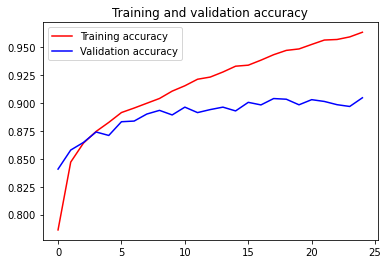

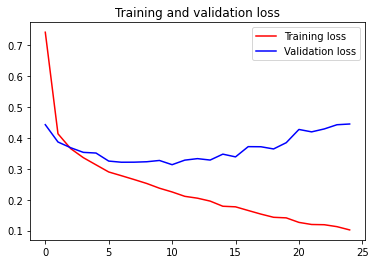

In [162]:
accuracy1_l2 = history1_l2.history['accuracy']
val_accuracy1_l2 = history1_l2.history['val_accuracy']
loss1_l2 = history1_l2.history['loss']
val_loss1_l2 = history1_l2.history['val_loss']
epochs = range(len(accuracy1_l2))

plt.plot(epochs, accuracy1_l2, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy1_l2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss1_l2, 'r', label='Training loss')
plt.plot(epochs, val_loss1_l2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Learning rate: 0.005

In [163]:
cnn1_l3 = Sequential()
cnn1_l3.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn1_l3.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn1_l3.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn1_l3.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn1_l3.add(Flatten())
cnn1_l3.add(Dense(1024, activation='relu'))

cnn1_l3.add(Dropout(rate=5e-1))


cnn1_l3.add(Dense(10, activation='softmax'))

In [164]:
opt= Adam(lr=5e-3, beta_1=0.9,beta_2=0.999)
cnn1_l3.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [165]:
history1_l3 = cnn1_l3.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 8s 16ms/step - loss: 0.9374 - accuracy: 0.7690 - val_loss: 0.4679 - val_accuracy: 0.8246
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.4350 - accuracy: 0.8392 - val_loss: 0.4223 - val_accuracy: 0.8452
Epoch 3/25
469/469 [==============================] - 7s 16ms/step - loss: 0.3896 - accuracy: 0.8557 - val_loss: 0.3798 - val_accuracy: 0.8611
Epoch 4/25
469/469 [==============================] - 7s 16ms/step - loss: 0.3639 - accuracy: 0.8659 - val_loss: 0.3702 - val_accuracy: 0.8612
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.3431 - accuracy: 0.8738 - val_loss: 0.3840 - val_accuracy: 0.8692
Epoch 6/25
469/469 [==============================] - 7s 16ms/step - loss: 0.3383 - accuracy: 0.8758 - val_loss: 0.3764 - val_accuracy: 0.8603
Epoch 7/25
469/469 [==============================] - 7s 16ms/step - loss: 0.3248 - accuracy: 0.8804 - val_loss: 0.3622 - val_accuracy: 0.8699

In [166]:
score1_l3 = cnn1_l3.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score1_l3[0])
print('Test accuracy:', score1_l3[1])

Test loss: 0.46244633197784424
Test accuracy: 0.8855000138282776


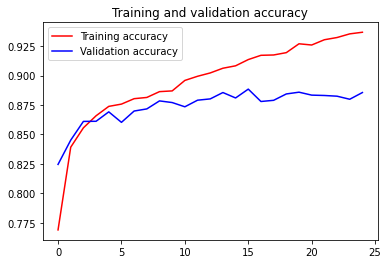

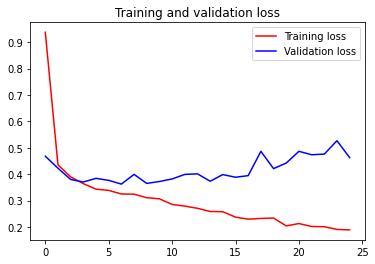

In [167]:
accuracy1_l3 = history1_l3.history['accuracy']
val_accuracy1_l3 = history1_l3.history['val_accuracy']
loss1_l3 = history1_l3.history['loss']
val_loss1_l3 = history1_l3.history['val_loss']
epochs = range(len(accuracy1_l3))

plt.plot(epochs, accuracy1_l3, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy1_l3, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss1_l3, 'r', label='Training loss')
plt.plot(epochs, val_loss1_l3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# MNIST dataset


In [18]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [19]:
y_train_2 = to_categorical(y_train_mnist)
y_test_2 = to_categorical(y_test_mnist)

In [20]:
# normalized data
x_train_2 , x_test_2 = x_train_mnist/255.0, x_test_mnist/255.0

In [21]:
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=5e-1))


cnn2.add(Dense(10, activation='softmax'))

In [22]:
opt= Adam(lr=1e-3, beta_1=0.9,beta_2=0.999)
cnn2.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
history_2 = cnn2.fit(x_train_2, y_train_2,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_2, y_test_2))

Epoch 1/25
469/469 [==============================] - 13s 21ms/step - loss: 0.3344 - accuracy: 0.9429 - val_loss: 0.0459 - val_accuracy: 0.9846
Epoch 2/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0549 - accuracy: 0.9832 - val_loss: 0.0557 - val_accuracy: 0.9822
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0431 - accuracy: 0.9865 - val_loss: 0.0360 - val_accuracy: 0.9878
Epoch 4/25
469/469 [==============================] - 8s 18ms/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0348 - val_accuracy: 0.9897
Epoch 5/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0359 - val_accuracy: 0.9885
Epoch 6/25
469/469 [==============================] - 9s 19ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0303 - val_accuracy: 0.9912
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0210 - accuracy: 0.9937 - val_loss: 0.0300 - val_accuracy: 0.991

In [24]:
score_2 = cnn2.evaluate(x_test_2, y_test_2, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.053597863763570786
Test accuracy: 0.9907000064849854


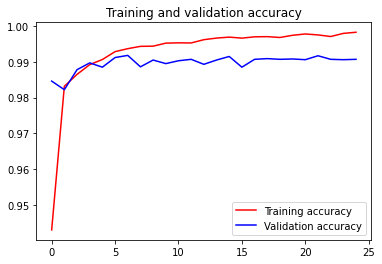

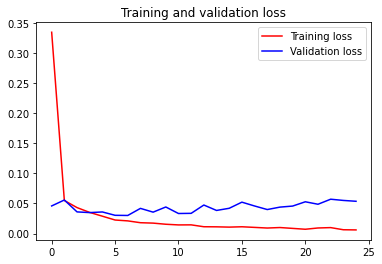

In [37]:
accuracy = history_2.history['accuracy']
val_accuracy = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# Experiments

Dropout rate experiments


Dropout rate = 0.4

In [25]:
cnn2_d1 = Sequential()
cnn2_d1.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2_d1.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2_d1.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2_d1.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2_d1.add(Flatten())
cnn2_d1.add(Dense(1024, activation='relu'))

cnn2_d1.add(Dropout(rate=4e-1))


cnn2_d1.add(Dense(10, activation='softmax'))

In [26]:
opt= Adam(lr=1e-3, beta_1=0.9,beta_2=0.999)
cnn2_d1.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [27]:
history_d1 = cnn2_d1.fit(x_train_2, y_train_2,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_2, y_test_2))

Epoch 1/25
469/469 [==============================] - 8s 16ms/step - loss: 0.2309 - accuracy: 0.9535 - val_loss: 0.0477 - val_accuracy: 0.9837
Epoch 2/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0484 - val_accuracy: 0.9849
Epoch 3/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0395 - val_accuracy: 0.9868
Epoch 4/25
469/469 [==============================] - 9s 18ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0350 - val_accuracy: 0.9891
Epoch 5/25
469/469 [==============================] - 9s 20ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0361 - val_accuracy: 0.9875
Epoch 6/25
469/469 [==============================] - 8s 16ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0365 - val_accuracy: 0.9901
Epoch 7/25
469/469 [==============================] - 8s 18ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0387 - val_accuracy: 0.9898

In [28]:
score_2_d1 = cnn2_d1.evaluate(x_test_2, y_test_2, verbose=0)
print('Test loss:', score_2_d1[0])
print('Test accuracy:', score_2_d1[1])

Test loss: 0.07873842865228653
Test accuracy: 0.9883999824523926


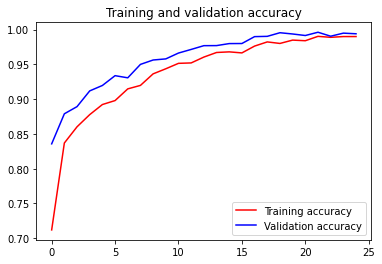

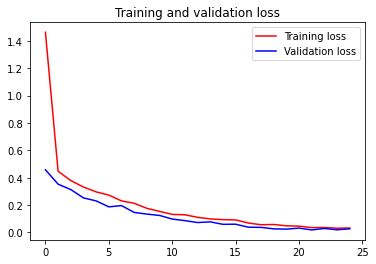

In [173]:
accuracy_d1 = history_d1.history['accuracy']
val_accuracy_d1 = history_d1.history['val_accuracy']
loss_d1 = history_d1.history['loss']
val_loss_d1 = history_d1.history['val_loss']
epochs = range(len(accuracy_d1))

plt.plot(epochs, accuracy_d1, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy_d1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss_d1, 'r', label='Training loss')
plt.plot(epochs, val_loss_d1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Dropout rate = 0.6

In [29]:
cnn2_d2 = Sequential()
cnn2_d2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2_d2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2_d2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2_d2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2_d2.add(Flatten())
cnn2_d2.add(Dense(1024, activation='relu'))

cnn2_d2.add(Dropout(rate=6e-1))


cnn2_d2.add(Dense(10, activation='softmax'))

In [30]:
opt= Adam(lr=1e-3, beta_1=0.9,beta_2=0.999)
cnn2_d2.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [31]:
history_d2 = cnn2_d2.fit(x_train_2, y_train_2,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_2, y_test_2))

Epoch 1/25
469/469 [==============================] - 8s 16ms/step - loss: 0.3112 - accuracy: 0.9488 - val_loss: 0.0725 - val_accuracy: 0.9759
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0579 - accuracy: 0.9824 - val_loss: 0.0398 - val_accuracy: 0.9866
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0295 - val_accuracy: 0.9902
Epoch 4/25
469/469 [==============================] - 8s 16ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0296 - val_accuracy: 0.9902
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.0331 - val_accuracy: 0.9903
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.0408 - val_accuracy: 0.9889
Epoch 7/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0279 - val_accuracy: 0.9916

In [35]:
score_2_d2 = cnn2_d2.evaluate(x_test_2, y_test_2, verbose=0)
print('Test loss:', score_2_d2[0])
print('Test accuracy:', score_2_d2[1])

Test loss: 0.05002434551715851
Test accuracy: 0.9918000102043152


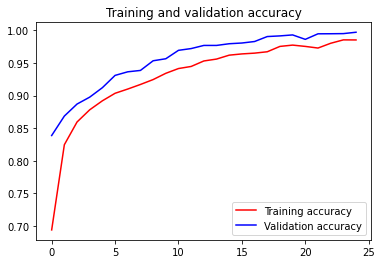

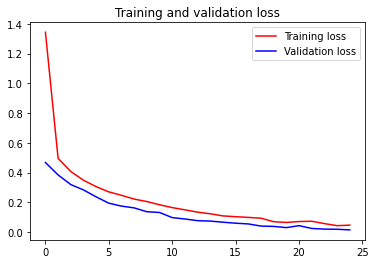

In [174]:
accuracy_d2 = history_d2.history['accuracy']
val_accuracy_d2 = history_d2.history['val_accuracy']
loss_d2 = history_d2.history['loss']
val_loss_d2 = history_d2.history['val_loss']
epochs = range(len(accuracy_d2))

plt.plot(epochs, accuracy_d2, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy_d2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss_d2, 'r', label='Training loss')
plt.plot(epochs, val_loss_d2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Dropout rate = 0.7

In [32]:
cnn2_d3 = Sequential()
cnn2_d3.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2_d3.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2_d3.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2_d3.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2_d3.add(Flatten())
cnn2_d3.add(Dense(1024, activation='relu'))

cnn2_d3.add(Dropout(rate=7e-1))


cnn2_d3.add(Dense(10, activation='softmax'))

In [33]:
opt= Adam(lr=1e-3, beta_1=0.9,beta_2=0.999)
cnn2_d3.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [36]:
history_d3 = cnn2_d3.fit(x_train_2, y_train_2,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_2, y_test_2))

Epoch 1/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0469 - val_accuracy: 0.9921
Epoch 2/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.0466 - val_accuracy: 0.9915
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0546 - val_accuracy: 0.9910
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.0659 - val_accuracy: 0.9911
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.0655 - val_accuracy: 0.9904
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.0586 - val_accuracy: 0.9906
Epoch 7/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.0679 - val_accuracy: 0.9910

In [49]:
score_2_d3 = cnn2_d3.evaluate(x_test_2, y_test_2, verbose=0)
print('Test loss:', score_2_d3[0])
print('Test accuracy:', score_2_d3[1])

Test loss: 0.09266095608472824
Test accuracy: 0.9904000163078308


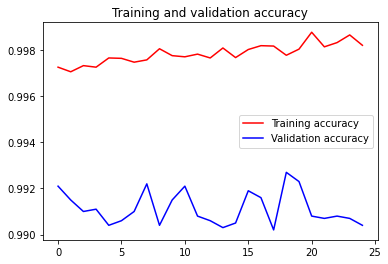

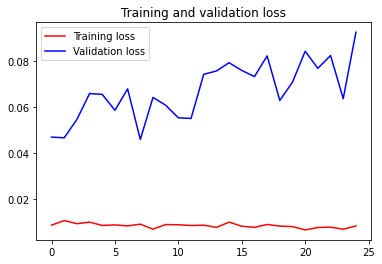

In [175]:
accuracy_d3 = history_d3.history['accuracy']
val_accuracy_d3 = history_d3.history['val_accuracy']
loss_d3 = history_d3.history['loss']
val_loss_d3 = history_d3.history['val_loss']
epochs = range(len(accuracy_d3))

plt.plot(epochs, accuracy_d3, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy_d3, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss_d3, 'r', label='Training loss')
plt.plot(epochs, val_loss_d3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# Batchsize change

Batchsize 64


In [43]:
cnn2_b1 = Sequential()
cnn2_b1.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2_b1.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2_b1.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2_b1.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2_b1.add(Flatten())
cnn2_b1.add(Dense(1024, activation='relu'))

cnn2_b1.add(Dropout(rate=5e-1))


cnn2_b1.add(Dense(10, activation='softmax'))

In [44]:
opt= Adam(lr=1e-3, beta_1=0.9,beta_2=0.999)
cnn2_b1.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [45]:
history_b1 = cnn2_d1.fit(x_train_2, y_train_2,
                  batch_size=64,
                  epochs=25,
                  validation_data=(x_test_2, y_test_2))

Epoch 1/25
938/938 [==============================] - 12s 12ms/step - loss: 0.0209 - accuracy: 0.9954 - val_loss: 0.0598 - val_accuracy: 0.9897
Epoch 2/25
938/938 [==============================] - 14s 14ms/step - loss: 0.0121 - accuracy: 0.9969 - val_loss: 0.0607 - val_accuracy: 0.9915
Epoch 3/25
938/938 [==============================] - 11s 12ms/step - loss: 0.0111 - accuracy: 0.9975 - val_loss: 0.0482 - val_accuracy: 0.9905
Epoch 4/25
938/938 [==============================] - 14s 15ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0759 - val_accuracy: 0.9901
Epoch 5/25
938/938 [==============================] - 11s 11ms/step - loss: 0.0122 - accuracy: 0.9971 - val_loss: 0.0590 - val_accuracy: 0.9897
Epoch 6/25
938/938 [==============================] - 11s 12ms/step - loss: 0.0102 - accuracy: 0.9976 - val_loss: 0.0812 - val_accuracy: 0.9895
Epoch 7/25
938/938 [==============================] - 12s 12ms/step - loss: 0.0112 - accuracy: 0.9976 - val_loss: 0.0795 - val_accuracy:

In [46]:
score_2_b1 = cnn2_b1.evaluate(x_test_2, y_test_2, verbose=0)
print('Test loss:', score_2_b1[0])
print('Test accuracy:', score_2_b1[1])

Test loss: 0.13759393990039825
Test accuracy: 0.9894000291824341


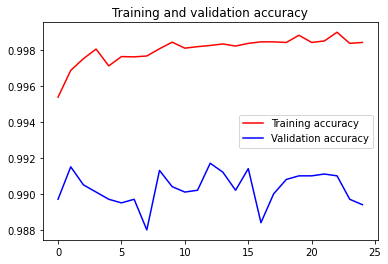

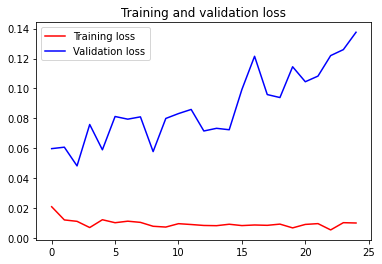

In [176]:
accuracy_b1 = history_b1.history['accuracy']
val_accuracy_b1 = history_b1.history['val_accuracy']
loss_b1 = history_b1.history['loss']
val_loss_b1 = history_b1.history['val_loss']
epochs = range(len(accuracy_b1))

plt.plot(epochs, accuracy_b1, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy_b1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss_b1, 'r', label='Training loss')
plt.plot(epochs, val_loss_b1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Batchsize = 256

In [71]:
cnn2_b2 = Sequential()
cnn2_b2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2_b2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2_b2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2_b2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2_b2.add(Flatten())
cnn2_b2.add(Dense(1024, activation='relu'))

cnn2_b2.add(Dropout(rate=5e-1))


cnn2_b2.add(Dense(10, activation='softmax'))

In [76]:
opt= Adam(lr=1e-3, beta_1=0.9,beta_2=0.999)
cnn2_b2.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [79]:
history_b2 = cnn2_b2.fit(x_train_2, y_train_2,
                  batch_size=256,
                  epochs=25,
                  validation_data=(x_test_2, y_test_2))

Epoch 1/25
235/235 [==============================] - 6s 23ms/step - loss: 0.6564 - accuracy: 0.9332 - val_loss: 0.0466 - val_accuracy: 0.9841
Epoch 2/25
235/235 [==============================] - 6s 24ms/step - loss: 0.0513 - accuracy: 0.9843 - val_loss: 0.0374 - val_accuracy: 0.9874
Epoch 3/25
235/235 [==============================] - 5s 23ms/step - loss: 0.0392 - accuracy: 0.9873 - val_loss: 0.0376 - val_accuracy: 0.9875
Epoch 4/25
235/235 [==============================] - 5s 23ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0283 - val_accuracy: 0.9906
Epoch 5/25
235/235 [==============================] - 5s 23ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0443 - val_accuracy: 0.9868
Epoch 6/25
235/235 [==============================] - 5s 23ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0290 - val_accuracy: 0.9909
Epoch 7/25
235/235 [==============================] - 5s 23ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0311 - val_accuracy: 0.9906

In [80]:
score_2_b2 = cnn2_b2.evaluate(x_test_2, y_test_2, verbose=0)
print('Test loss:', score_2_b2[0])
print('Test accuracy:', score_2_b2[1])

Test loss: 0.049636390060186386
Test accuracy: 0.9896000027656555


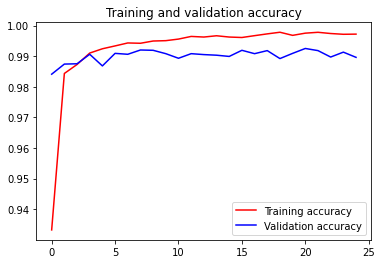

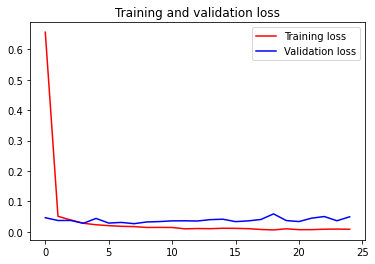

In [177]:
accuracy_b2 = history_b2.history['accuracy']
val_accuracy_b2 = history_b2.history['val_accuracy']
loss_b2 = history_b2.history['loss']
val_loss_b2 = history_b2.history['val_loss']
epochs = range(len(accuracy_b2))

plt.plot(epochs, accuracy_b2, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy_b2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss_b2, 'r', label='Training loss')
plt.plot(epochs, val_loss_b2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# Learning Rate change

Learning rate = 0.01

In [56]:
cnn2_l1 = Sequential()
cnn2_l1.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2_l1.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2_l1.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2_l1.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2_l1.add(Flatten())
cnn2_l1.add(Dense(1024, activation='relu'))

cnn2_l1.add(Dropout(rate=5e-1))


cnn2_l1.add(Dense(10, activation='softmax'))

In [57]:
opt= Adam(lr=1e-2, beta_1=0.9,beta_2=0.999)
cnn2_l1.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [58]:
history_l1 = cnn2_l1.fit(x_train_2, y_train_2,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_2, y_test_2))

Epoch 1/25
469/469 [==============================] - 10s 18ms/step - loss: 2.0617 - accuracy: 0.8943 - val_loss: 0.1362 - val_accuracy: 0.9577
Epoch 2/25
469/469 [==============================] - 8s 18ms/step - loss: 0.1976 - accuracy: 0.9437 - val_loss: 0.1063 - val_accuracy: 0.9671
Epoch 3/25
469/469 [==============================] - 8s 17ms/step - loss: 0.1598 - accuracy: 0.9538 - val_loss: 0.1169 - val_accuracy: 0.9668
Epoch 4/25
469/469 [==============================] - 9s 19ms/step - loss: 0.1516 - accuracy: 0.9570 - val_loss: 0.1053 - val_accuracy: 0.9681
Epoch 5/25
469/469 [==============================] - 9s 18ms/step - loss: 0.1386 - accuracy: 0.9595 - val_loss: 0.0857 - val_accuracy: 0.9756
Epoch 6/25
469/469 [==============================] - 9s 19ms/step - loss: 0.1290 - accuracy: 0.9629 - val_loss: 0.0783 - val_accuracy: 0.9770
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1291 - accuracy: 0.9634 - val_loss: 0.0909 - val_accuracy: 0.974

In [59]:
score_2_l1 = cnn2_l1.evaluate(x_test_2, y_test_2, verbose=0)
print('Test loss:', score_2_l1[0])
print('Test accuracy:', score_2_l1[1])

Test loss: 0.13076263666152954
Test accuracy: 0.9678999781608582


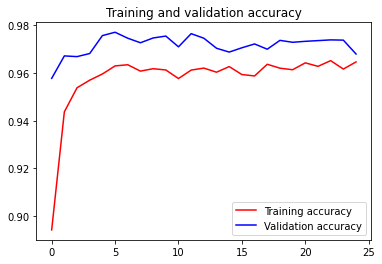

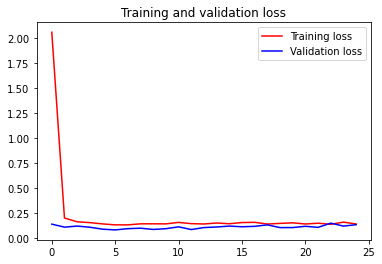

In [178]:
accuracy_l1 = history_l1.history['accuracy']
val_accuracy_l1 = history_l1.history['val_accuracy']
loss_l1 = history_l1.history['loss']
val_loss_l1 = history_l1.history['val_loss']
epochs = range(len(accuracy_l1))

plt.plot(epochs, accuracy_l1, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy_l1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss_l1, 'r', label='Training loss')
plt.plot(epochs, val_loss_l1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Learning rate = 0.002

In [61]:
cnn2_l2 = Sequential()
cnn2_l2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2_l2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2_l2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2_l2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2_l2.add(Flatten())
cnn2_l2.add(Dense(1024, activation='relu'))

cnn2_l2.add(Dropout(rate=5e-1))


cnn2_l2.add(Dense(10, activation='softmax'))

In [62]:
opt= Adam(lr=2e-3, beta_1=0.9,beta_2=0.999)
cnn2_l2.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [63]:
history_l2 = cnn2_l2.fit(x_train_2, y_train_2,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_2, y_test_2))

Epoch 1/25
469/469 [==============================] - 8s 16ms/step - loss: 0.3560 - accuracy: 0.9484 - val_loss: 0.0635 - val_accuracy: 0.9792
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0692 - accuracy: 0.9798 - val_loss: 0.0445 - val_accuracy: 0.9862
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0445 - val_accuracy: 0.9867
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0375 - accuracy: 0.9891 - val_loss: 0.0471 - val_accuracy: 0.9873
Epoch 5/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0437 - val_accuracy: 0.9877
Epoch 6/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0504 - val_accuracy: 0.9870
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0515 - val_accuracy: 0.9858

In [64]:
score_2_l2 = cnn2_l2.evaluate(x_test_2, y_test_2, verbose=0)
print('Test loss:', score_2_l2[0])
print('Test accuracy:', score_2_l2[1])

Test loss: 0.10191494226455688
Test accuracy: 0.986299991607666


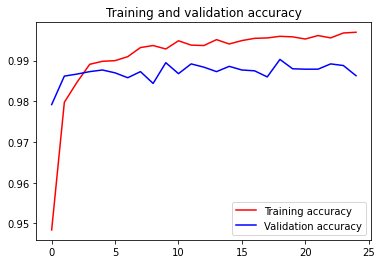

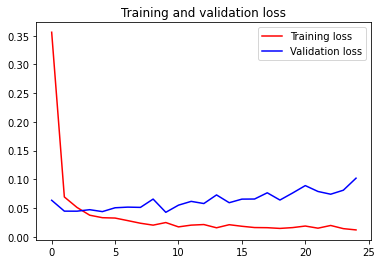

In [179]:
accuracy_l2 = history_l2.history['accuracy']
val_accuracy_l2 = history_l2.history['val_accuracy']
loss_l2 = history_l2.history['loss']
val_loss_l2 = history_l2.history['val_loss']
epochs = range(len(accuracy_l2))

plt.plot(epochs, accuracy_l2, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy_l2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss_l2, 'r', label='Training loss')
plt.plot(epochs, val_loss_l2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Learning rate : 0.005

In [66]:
cnn2_l3 = Sequential()
cnn2_l3.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2_l3.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2_l3.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2_l3.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2_l3.add(Flatten())
cnn2_l3.add(Dense(1024, activation='relu'))

cnn2_l3.add(Dropout(rate=5e-1))


cnn2_l3.add(Dense(10, activation='softmax'))

In [67]:
opt= Adam(lr=5e-3, beta_1=0.9,beta_2=0.999)
cnn2_l3.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [68]:
history_l3 = cnn2_l3.fit(x_train_2, y_train_2,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_2, y_test_2))

Epoch 1/25
469/469 [==============================] - 8s 16ms/step - loss: 0.7377 - accuracy: 0.9354 - val_loss: 0.0911 - val_accuracy: 0.9716
Epoch 2/25
469/469 [==============================] - 7s 16ms/step - loss: 0.1050 - accuracy: 0.9697 - val_loss: 0.0660 - val_accuracy: 0.9806
Epoch 3/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0821 - accuracy: 0.9754 - val_loss: 0.0623 - val_accuracy: 0.9817
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0685 - accuracy: 0.9801 - val_loss: 0.0602 - val_accuracy: 0.9825
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0619 - accuracy: 0.9809 - val_loss: 0.0568 - val_accuracy: 0.9835
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0566 - accuracy: 0.9839 - val_loss: 0.0625 - val_accuracy: 0.9818
Epoch 7/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0538 - accuracy: 0.9837 - val_loss: 0.0710 - val_accuracy: 0.9812

In [200]:
score_2_l3 = cnn2_l3.evaluate(x_test_2, y_test_2, verbose=0)
print('Test loss:', score_2_l3[0])
print('Test accuracy:', score_2_l3[1])

Test loss: 0.08368417620658875
Test accuracy: 0.9835000038146973


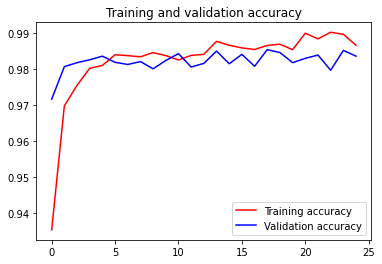

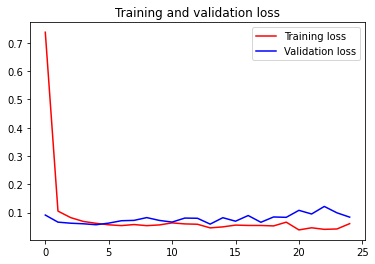

In [180]:
accuracy_l3 = history_l3.history['accuracy']
val_accuracy_l3 = history_l3.history['val_accuracy']
loss_l3 = history_l3.history['loss']
val_loss_l3 = history_l3.history['val_loss']
epochs = range(len(accuracy_l3))

plt.plot(epochs, accuracy_l3, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy_l3, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss_l3, 'r', label='Training loss')
plt.plot(epochs, val_loss_l3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()